In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# Read the CSV file - skip the header lines starting with #
file_path=r'C:\Users\castl\Desktop\Internship stuff\Data_Lionel\Data_Lionel\EMC_data\HEPData-ins280143-v1-csv\Table7.csv'

In [6]:
#Find where the actual data starts
with open(file_path, 'r') as file:
    lines=file.readlines()

In [7]:
# Find the line with column headers (the last line before data that doesn't start with #)
header_line = None
for i, line in enumerate(lines):
    if not line.startswith('#') and ',' in line:
        header_line = i
        break

print(f"Found header at line {header_line}")
print(f"Header: {lines[header_line].strip()}")

Found header at line 11
Header: X,Q2 [GEV**2],G1,stat +,stat -,sys +,sys -,"sys,Normalisation uncertainty due to errors in polarisation and F2 value +","sys,Normalisation uncertainty due to errors in polarisation and F2 value -"


In [12]:
#Read the CSV starting from the header line
df=pd.read_csv(file_path, skiprows=header_line)

#Clean up column names (strip whitespace)
df.columns=df.columns.str.strip()

# Print column names to verify
print("Column names:", df.columns.tolist())

Column names: ['X', 'Q2 [GEV**2]', 'G1', 'stat +', 'stat -', 'sys +', 'sys -', 'sys,Normalisation uncertainty due to errors in polarisation and F2 value +', 'sys,Normalisation uncertainty due to errors in polarisation and F2 value -']


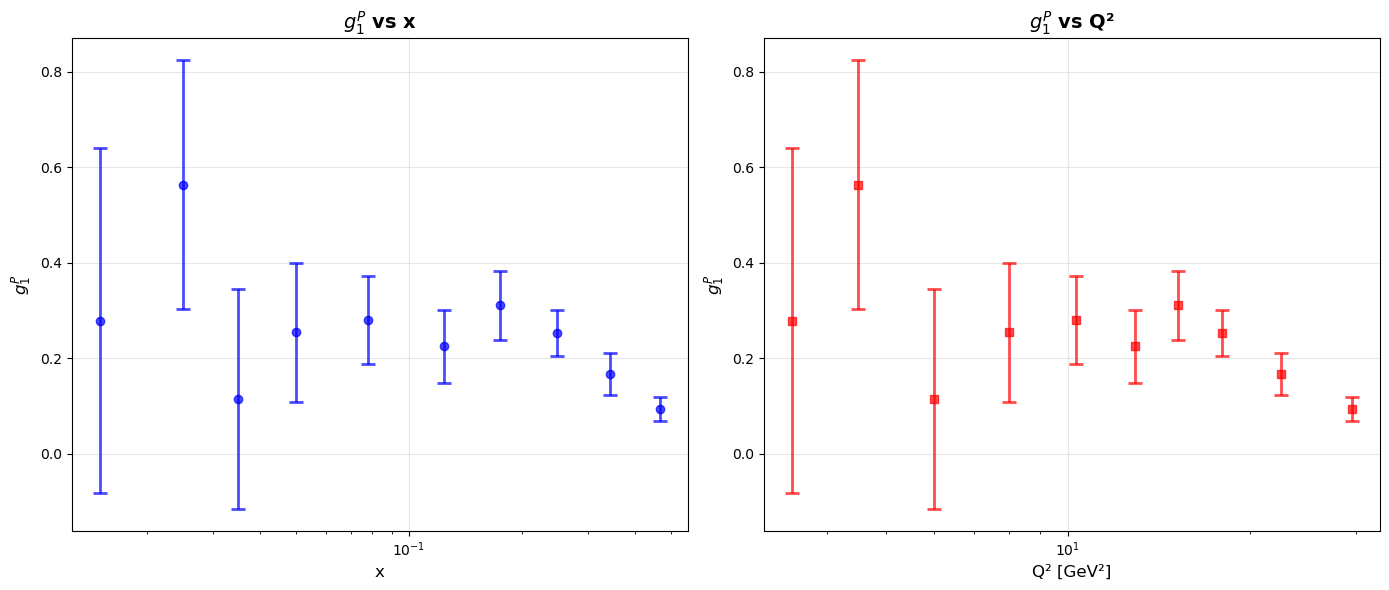


Data summary:
Number of data points: 10
x range: 0.015 - 0.466
Q² range: 3.5 - 29.5 GeV²
g₁^P range: 0.094 - 0.564
Average statistical error: 0.136


In [14]:
#Plotting and Statistics
#Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: g₁ vs x
ax1.errorbar(df['X'], df['G1'], yerr=df['stat +'], 
             fmt='o', capsize=5, capthick=2, elinewidth=2, markersize=6,
             color='blue', ecolor='blue', alpha=0.7)
ax1.set_xlabel('x', fontsize=12)
ax1.set_ylabel('$g_1^P$', fontsize=12)
ax1.set_title('$g_1^P$ vs x', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.set_xscale('log')

# Plot 2: g₁ vs Q²
ax2.errorbar(df['Q2 [GEV**2]'], df['G1'], yerr=df['stat +'], 
             fmt='s', capsize=5, capthick=2, elinewidth=2, markersize=6,
             color='red', ecolor='red', alpha=0.7)
ax2.set_xlabel('Q² [GeV²]', fontsize=12)
ax2.set_ylabel('$g_1^P$', fontsize=12)
ax2.set_title('$g_1^P$ vs Q²', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.set_xscale('log')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# Print some statistics
print(f"\nData summary:")
print(f"Number of data points: {len(df)}")
print(f"x range: {df['X'].min():.3f} - {df['X'].max():.3f}")
print(f"Q² range: {df['Q2 [GEV**2]'].min():.1f} - {df['Q2 [GEV**2]'].max():.1f} GeV²")
print(f"g₁^P range: {df['G1'].min():.3f} - {df['G1'].max():.3f}")
print(f"Average statistical error: {df['stat +'].mean():.3f}")